Randomized algorithm

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import math
from scipy.special import lambertw
from math import e

In [35]:
def ALPHAOPT(current_comms_uniform,current_comps_local,current_comps_remote):

  makespans = []

  for i in range(len(current_comms_uniform)):
    makespans.append(sum(current_comps_local[:i])+current_comms_uniform[i]+sum(current_comps_remote[i:]))
  return np.min(makespans), np.argmin(makespans), np.max(makespans)/np.min(makespans)


In [36]:
def DOPart(current_comms_uniform,current_comps_local,current_comps_remote,alm,alM,counter):

  best = sum(current_comps_local)
  c_best = current_comms_uniform[-1]

  for i in range(len(current_comms_uniform)):
      if i == len(current_comps_remote):
        Pr_i = 0
      else:
        Pr_i = current_comps_remote[i]

      term0 = sum(current_comps_local[:i]) + sum(current_comps_remote[i:])
      term1 = sum(current_comps_local[:i]) + alm*Pr_i + min(alm,1)*sum(current_comps_remote[i+1:])
      term2 = sum(current_comps_local[:i]) + max(alM,1)*sum(current_comps_remote[i:])
 
      if current_comms_uniform[i] <= (math.sqrt(term1*term2) - term0):
          c_best = current_comms_uniform[i]
          best = term0 + c_best
          if i is not (len(current_comms_uniform)-1):
            counter = counter + 1
          return best, c_best, i, counter
  return best, c_best, len(current_comms_uniform), counter


In [39]:
#Non Adaptive Randomized Thresholding Algorithm

def DOPartRAND(current_comms_uniform,current_comps_local,current_comps_remote,r,R):

  Tr = sum(current_comps_remote)
  alm = r
  alM = R
  al = alM/alm
  ep = (-R* lambertw((1/(al*e))-1/e)).real
  b = random.random()

  bound = (-R/(R-ep))*np.log(ep/(R-r))

  if b >= bound:
    k = R
  else:
    k = R - (R-r)/(math.exp(b*(R-ep)/R))

  thresh = k

  for i in range(len(current_comms_uniform)):
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      if  T_i <= thresh*Tr:
        return T_i, current_comms_uniform[i], i

  return sum(current_comps_local),0, len(current_comms_uniform)

In [40]:
#Adaptive Randomized Thresholding Algorithm

def DOPartARAND(current_comms_uniform,current_comps_local,current_comps_remote,r,R):

  
  b = random.random()
  for i in range(len(current_comms_uniform)):
      
      T_bar = sum(current_comps_local[:i]) + sum(current_comps_remote[i:])
      alm = sum(current_comps_local[:i]) + r*sum(current_comps_remote[i:])
      alm = alm/T_bar
      alM = sum(current_comps_local[:i]) + R*sum(current_comps_remote[i:])
      alM = alM/T_bar
      al = alM/alm

      ep = (-alM* lambertw((1/(al*e))-1/e)).real

      bound = (-alM/(alM-ep))*np.log(ep/(alM-alm))

      if b >= bound:
        k = alM
      else:
        k = alM - (alM-alm)/(math.exp(b*(alM-ep)/alM))

      thresh = k
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      if  T_i <= thresh*T_bar:
        return T_i, current_comms_uniform[i], i

  return sum(current_comps_local),0, len(current_comms_uniform)

In [41]:
#Non Adaptive Double Randomized Thresholding Algorithm

def DOPartRANDR(current_comms_uniform,current_comps_local,current_comps_remote,r,R):

  Tr = sum(current_comps_remote)
  alm = r
  alM = R
  al = alM/alm
  ep = (-R* lambertw((1/(al*e))-1/e)).real


  for i in range(len(current_comms_uniform)):
      
      b = random.random()
      bound = (-R/(R-ep))*np.log(ep/(R-r))
      if b >= bound:
        k = R
      else:
        k = R - (R-r)/(math.exp(b*(R-ep)/R))

      thresh = k
      
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      if  T_i <= thresh*Tr:
        return T_i, current_comms_uniform[i], i

  return sum(current_comps_local),0, len(current_comms_uniform)

In [42]:
#Non Adaptive Double Randomized Thresholding Algorithm

def DOPartARANDR(current_comms_uniform,current_comps_local,current_comps_remote,r,R):

  Tr = sum(current_comps_remote)
  alm = r
  alM = R
  al = alM/alm
  ep = (-R* lambertw((1/(al*e))-1/e)).real


  for i in range(len(current_comms_uniform)):
      
      b = random.random()
      bound = (-R/(R-ep))*np.log(ep/(R-r))
      if b >= bound:
        k = R
      else:
        k = R - (R-r)/(math.exp(b*(R-ep)/R))

      thresh = k
      
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      if  T_i <= thresh*Tr:
        return T_i, current_comms_uniform[i], i

  return sum(current_comps_local),0, len(current_comms_uniform)

In [43]:
#Non Adaptive Double Randomized Thresholding Algorithm

def TBP(current_comms_uniform,current_comps_local,current_comps_remote,r,R):

  Tr = sum(current_comps_remote)
  alm = r
  alM = R
  al = alM/alm
  ep = (-R* lambertw((1/(al*e))-1/e)).real


  for i in range(len(current_comms_uniform)):
      
      b = random.random()
      bound = (-R/(R-ep))*np.log(ep/(R-r))
      if b >= bound:
        k = R
      else:
        k = R - (R-r)/(math.exp(b*(R-ep)/R))

      thresh = k
      
      T_i = sum(current_comps_local[:i]) + current_comms_uniform[i] + sum(current_comps_remote[i:])
      if  T_i <= thresh*Tr:
        return T_i, current_comms_uniform[i], i

  return sum(current_comps_local),0, len(current_comms_uniform)

Alpha vs Deterministic Alg (1-10)

In [45]:
def system_values(i):
    n = 33
    match i:
        case 0:
            with open('resnet34_compute_values_224_t4.npy', 'rb') as f:
                model_compute_values = np.load(f,allow_pickle=True)
            model_compute_values_remote = model_compute_values[1000:10000,:] #1000 or 10000
            compute_values_remote = np.mean(model_compute_values_remote,axis=0)
            input_data_real = np.array([224*224*3, 64*112*112, 64*56*56, 64*56*56, 64*56*56, 64*56*56, 64*56*56, 64*56*56, 64*56*56, 128*28*28, 128*28*28, 128*28*28, 128*28*28, 128*28*28, 128*28*28, 128*28*28, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 256*14*14, 512*7*7, 512*7*7, 512*7*7, 512*7*7, 512*7*7, 512*1*1])
        case 1:
            compute_values_remote = np.concatenate([np.zeros(n-1), [10]])
            input_data_real = np.concatenate([[10]*n]) 
    print(len(compute_values_remote),len(input_data_real))
    return compute_values_remote,input_data_real

In [46]:
alphas = [1,1.5,2,2.5,3]

algs = ["AutoNeuro", "DOPart", "Neuro", "Remote Only", "Local Only", "DOPart-R", "DOPart-DR", "DOPart-AR", "DOPart-DAR", "Threat Based", "OPT"]

current_comps_remote, input_data_real = system_values(1)


33 33


In [47]:
def genAlphas(a,b,n):
    return [a+(b-a)*random.random() for _ in range(n)]

In [48]:
def generateSamples(i):

  R = alphas[i]
  r = 1
  
  log_uniform = False
  comms_uniform = True

  if log_uniform == True:
    b = math.pow(2,R)
    a = math.pow(2,r)
  else:
     b = R
     a = r

  lb = 0.25
  ub = 2.5
  

  TALG = [[] for _ in range(len(algs))] 
  


  current_comps_local = []
  for z in range(7000):
    current_comps_local.append(np.multiply(current_comps_remote,genAlphas(a,b,len(current_comps_remote))))

  current_comms_uniform = []
  Rl = sum(current_comps_remote)
  bandwidth=input_data_real[0]/Rl
  for z in range(7000):
    current_comms_uniform_AN = []
    for p in range(len(current_comps_remote)):    
      rb = bandwidth*(lb) + random.random()*(bandwidth)*(ub)
      if comms_uniform == False:
        current_comms_uniform_AN.append(input_data_real[p]/rb)
      else:
        current_comms_uniform_AN.append((a+random.random()*(b-a))*Rl)
    current_comms_uniform_AN.append(0)
    current_comms_uniform.append(current_comms_uniform_AN)

  makespan = []
  for p in range(len(current_comms_uniform[0])):
      val = 0
      for z in range(7000):
          val = val + sum(current_comps_local[z][:p])+current_comms_uniform[z][p]+sum(current_comps_remote[p:])
      val = val/7000
      makespan.append(val)
  ANeuro_best_point = np.argmin(makespan)

  for j in range(7000):

    alg_best11 = sum(current_comps_local[j][:ANeuro_best_point]) + current_comms_uniform[j][ANeuro_best_point] + sum(current_comps_remote[ANeuro_best_point:])
    
    comm_neuro = 0
    comp_neuro = current_comps_local[j][0]/current_comps_remote[0]
    current_comms_uniform_neuro = [input_data_real[p]/comm_neuro for p in range(len(current_comps_local[j]))]
    current_comms_uniform_neuro.append(0)
    current_comps_local_neuro = comp_neuro*current_comps_remote
    alg_best13, opt_best_point, max_seq = ALPHAOPT(current_comms_uniform_neuro,current_comps_local_neuro,current_comps_remote)
    alg_best13 = sum(current_comps_local[j][:opt_best_point]) + current_comms_uniform[j][opt_best_point] + sum(current_comps_remote[opt_best_point:])
    
    opt_best, opt_best_point, max_seq = ALPHAOPT(current_comms_uniform[j],current_comps_local[j],current_comps_remote)
    
    alg_best12, c_cut12, alg_best2_point, counter = DOPart(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b,0)
    alg_best5, c_cut5, alg_best5_point = DOPartRAND(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b) #USED
    alg_best6, c_cut6, alg_best6_point = DOPartRANDR(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b) #USED
    alg_best7, c_cut7, alg_best7_point = DOPartARAND(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b) #USED
    alg_best8, c_cut8, alg_best8_point = DOPartARANDR(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b) #USED
    alg_best9, c_cut9, alg_best9_point = TBP(current_comms_uniform[j],current_comps_local[j],current_comps_remote, a, b) #USED
    
    alg_best2 = sum(current_comps_local[j][:0]) + current_comms_uniform[j][0] + sum(current_comps_remote[0:])
    alg_best3 = sum(current_comps_local[j][:len(current_comps_local[j])]) + current_comms_uniform[j][len(current_comps_local[j])] + sum(current_comps_remote[len(current_comps_local[j]):])


    TALG[0].append(alg_best11)
    TALG[1].append(alg_best12)
    TALG[2].append(alg_best13)
    TALG[3].append(alg_best2)
    TALG[4].append(alg_best3)
    TALG[5].append(alg_best5)
    TALG[6].append(alg_best6)
    TALG[7].append(alg_best7)
    TALG[8].append(alg_best8)
    TALG[9].append(alg_best9)
    TALG[10].append(opt_best)
  return (TALG)

In [49]:
TALG_final = [[] for _ in range(len(algs))] 

for i in range(len(alphas)):
  TALG = generateSamples(i)
  print(f"Completed for alpha value = {alphas[i]}")
  for j in range(len(TALG)):
    TALG_final[j].append(TALG[j])


C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\4275141004.py:56: RuntimeWarning: invalid value encountered in scalar divide
  comp_neuro = current_comps_local[j][0]/current_comps_remote[0]
C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\4275141004.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  current_comms_uniform_neuro = [input_data_real[p]/comm_neuro for p in range(len(current_comps_local[j]))]
C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\971239103.py:12: RuntimeWarning: invalid value encountered in scalar divide
  bound = (-R/(R-ep))*np.log(ep/(R-r))
C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\3217259492.py:15: RuntimeWarning: invalid value encountered in scalar divide
  bound = (-R/(R-ep))*np.log(ep/(R-r))
C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\87897018.py:18: RuntimeWarning: invalid value encountered in scalar divide
  bound = (-alM/(alM-ep))*np.log(ep/(alM-alm))


Completed for alpha value = 1
Completed for alpha value = 1.5
Completed for alpha value = 2
Completed for alpha value = 2.5
Completed for alpha value = 3


In [50]:
for i in range(5):
  if sum(TALG_final[1][i])/7000 < sum(TALG_final[2][i])/7000 and sum(TALG_final[1][i])/7000 < sum(TALG_final[0][i])/7000:
    print(i,"- DOPart:",sum(TALG_final[1][i])/7000,"Neuro:",sum(TALG_final[2][i])/7000,"AutoNeuro:",sum(TALG_final[0][i])/7000)
    print("Neuro %: ",100*(sum(TALG_final[0][i])-sum(TALG_final[1][i]))/sum(TALG_final[0][i]),"AutoNeuro %:",100*(sum(TALG_final[2][i])-sum(TALG_final[1][i]))/sum(TALG_final[2][i]))

In [51]:
ignore = [0,2]
compiled = []

for k in range(len(algs)):
  print("Processing Algorithm:",algs[k])
  if k not in ignore:
    for i in range(len(alphas)):
        for j in range(7000):
          compiled.append([TALG_final[k][i][j], alphas[i], algs[k]])

Processing Algorithm: AutoNeuro
Processing Algorithm: DOPart
Processing Algorithm: Neuro
Processing Algorithm: Remote Only
Processing Algorithm: Local Only
Processing Algorithm: DOPart-R
Processing Algorithm: DOPart-DR
Processing Algorithm: DOPart-AR
Processing Algorithm: DOPart-DAR
Processing Algorithm: Threat Based
Processing Algorithm: OPT


In [52]:
df_main1 = pd.DataFrame(compiled, columns = ['Average Makespan', 'Alpha', 'Alg'])

In [53]:
df_main1["Average Makespan"] = df_main1["Average Makespan"].div(0.001)

In [54]:
sns.set(rc={'figure.figsize':(6,3)})

In [55]:
from matplotlib import rc
import matplotlib.pyplot as plt

In [56]:
plt.rcParams["figure.figsize"] = [6,3]
plt.rcParams["figure.autolayout"] = True

In [57]:
df_main1.head()

,Average Makespan,Alpha,Alg
0,10000.0,1.0,DOPart
1,10000.0,1.0,DOPart
2,10000.0,1.0,DOPart
3,10000.0,1.0,DOPart
4,10000.0,1.0,DOPart


C:\Users\shiva\AppData\Local\Temp\ipykernel_27088\3921380396.py:14: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange', 'cyan'],


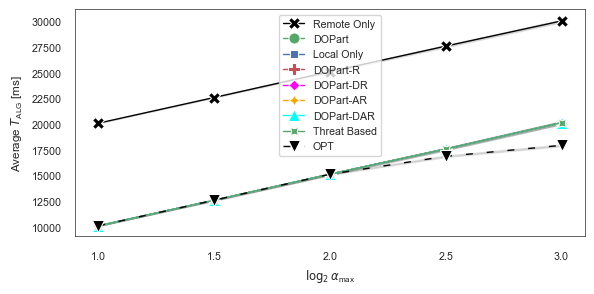

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small

sns.set_theme(font_scale=0.7, style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange', 'cyan'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
if log_uniform == True:
  h.set_xlabel(r'$\log_2\alpha$' + r'$_\mathregular{max}$')
else:
  h.set_xlabel(r'$\alpha$' + r'$_\mathregular{max}$')
h.set_ylabel(r'Average ' + r'$T_\mathregular{ALG}$' + r' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

C:\Users\saxen\AppData\Local\Temp\ipykernel_12068\3921380396.py:14: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange', 'cyan'],


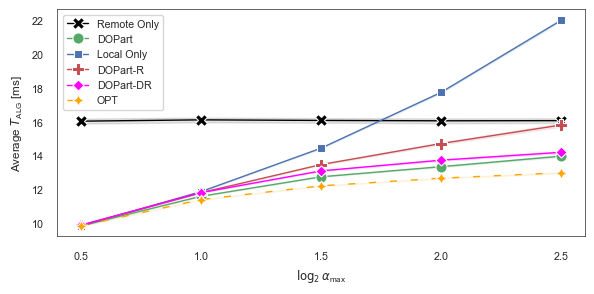

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small

sns.set_theme(font_scale=0.7, style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange', 'cyan'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$' + r'$_\mathregular{max}$')
h.set_ylabel(r'Average ' + r'$T_\mathregular{ALG}$' + r' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\saxen\AppData\Local\Temp\ipykernel_34744\975756954.py:18: SyntaxWarning: invalid escape sequence '\m'
  h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
C:\Users\saxen\AppData\Local\Temp\ipykernel_34744\975756954.py:19: SyntaxWarning: invalid escape sequence '\m'
  h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
C:\Users\saxen\AppData\Local\Temp\ipykernel_34744\975756954.py:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


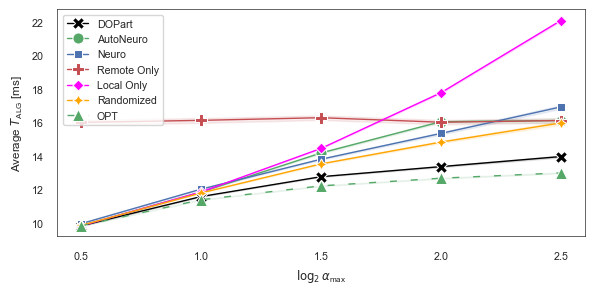

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\saxen\AppData\Local\Temp\ipykernel_31332\975756954.py:18: SyntaxWarning: invalid escape sequence '\m'
  h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
C:\Users\saxen\AppData\Local\Temp\ipykernel_31332\975756954.py:19: SyntaxWarning: invalid escape sequence '\m'
  h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
C:\Users\saxen\AppData\Local\Temp\ipykernel_31332\975756954.py:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


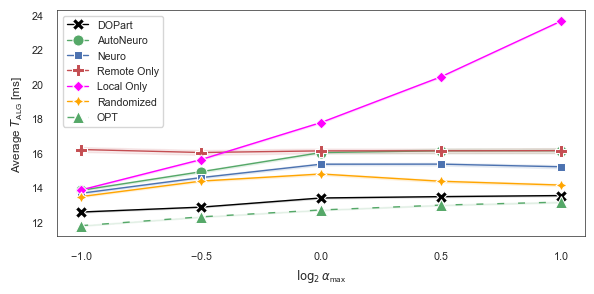

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<ipython-input-112-975756954>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


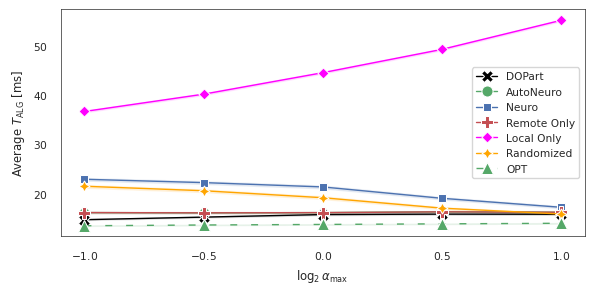

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<ipython-input-83-975756954>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


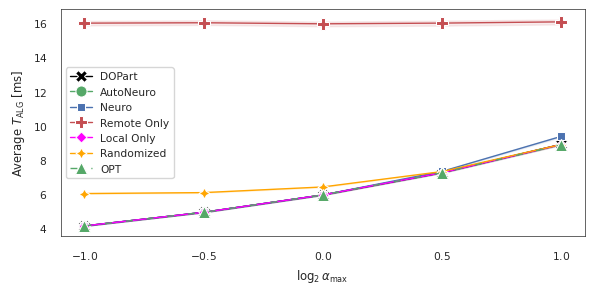

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<ipython-input-110-54cd6e80491d>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


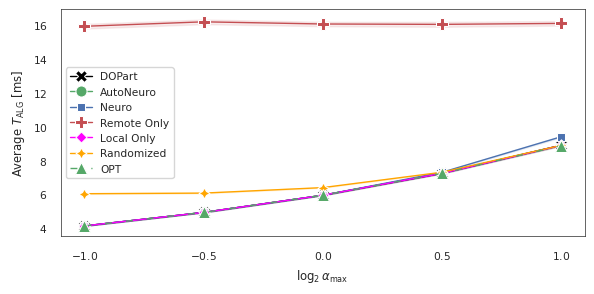

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<ipython-input-182-54cd6e80491d>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


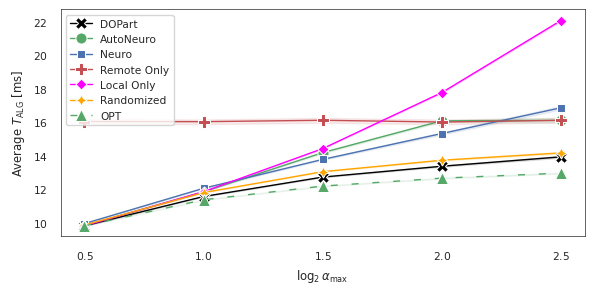

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

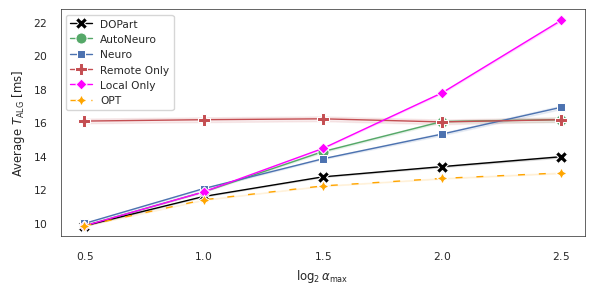

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [ms]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

[x.set_linewidth(0.5) for x in ax.spines.values()]


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

<ipython-input-302-14f8843e19af>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


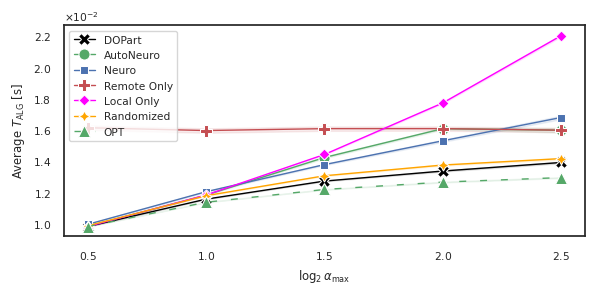

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.7,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'alpha':0.1}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xlabel(r'$\log_2\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')
h.ticklabel_format(useMathText=True)

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

cbformat = mticker.ScalarFormatter(useMathText=True)
cbformat.set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(cbformat)

# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("resnet34_max.pdf", bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams["axes.formatter.limits"]

[-5, 6]

In [ ]:
len(compiled)

280000

<ipython-input-94-779e69b0d763>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


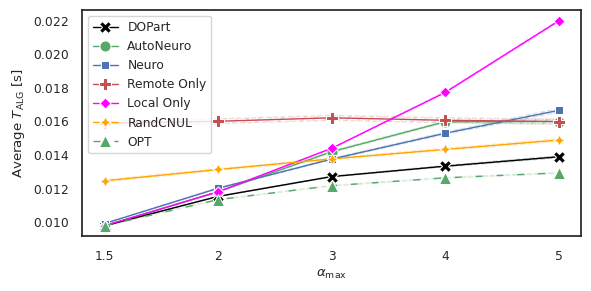

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.8,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'linestyle': '--', 'hatch': '///', 'fc': 'none'}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['1.5','2','3','4','5'])
h.set_xlabel(r'$\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("alex_max.svg", format='svg')
plt.show()

<ipython-input-95-779e69b0d763>:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],


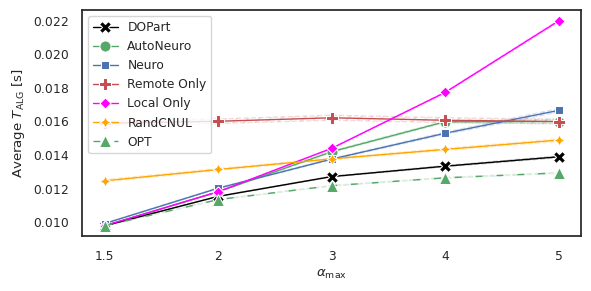

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.8,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'linestyle': '--', 'hatch': '///', 'fc': 'none'}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['1.5','2','3','4','5'])
h.set_xlabel(r'$\alpha$'+'$_\mathregular{max}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("alex_max.svg", format='svg')
plt.show()

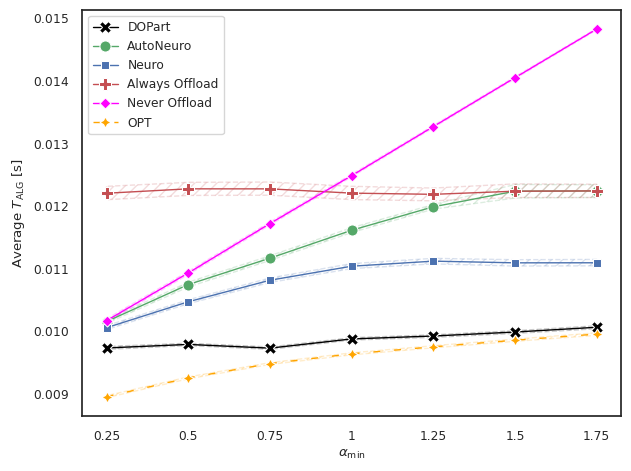

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.8,style='white')

fig, ax = plt.subplots()


d_style = {}
for i in algs:
  d_style[i]=''

d_style[algs[-1]] = (5, 10)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1, palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=d_style, markersize=8, err_style="band", err_kws={'linestyle': '--', 'hatch': '///', 'fc': 'none'}) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha$'+'$_\mathregular{min}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("alex_min.svg", format='svg')
plt.show()

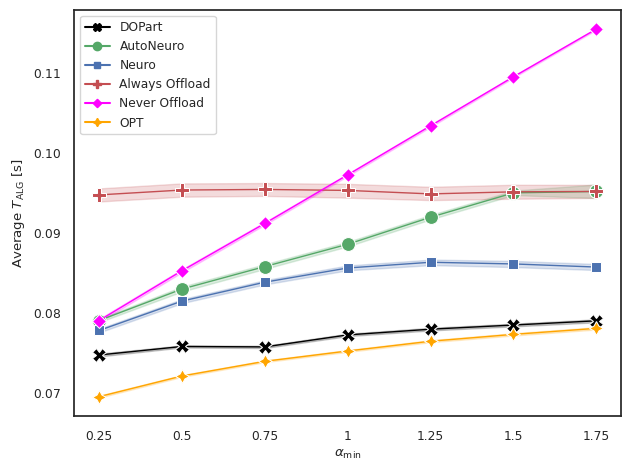

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.8,style='white')

fig, ax = plt.subplots()


style = []
for i in alphas:
  style[i]=''

style[alphas[-1]] = sns._core.unique_dashes(1)

h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1,palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=style, markersize=10, err_style="band") #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha$'+'$_\mathregular{min}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("alex_min.svg", format='svg')
plt.show()

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
import matplotlib.ticker as mticker

sns.set(font_scale=0.8,style='white')

fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1,style="Alg",linewidth=1,palette=['g', 'black','b','r','magenta', 'orange'],
    markers=True, dashes=False, markersize=10, err_style="band") #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.111','0.125','0.143','0.167','0.200','0.250','0.333'])
h.set_xlabel(r'$\alpha$'+'$_\mathregular{min}$')
h.set_ylabel('Average '+'$T_\mathregular{ALG}$'+' [s]')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])

ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))


# ax.grid(False)
# plt.ticklabel_format(style='sci', axis='y')

plt.savefig("alex_min.svg", format='svg')
plt.show()

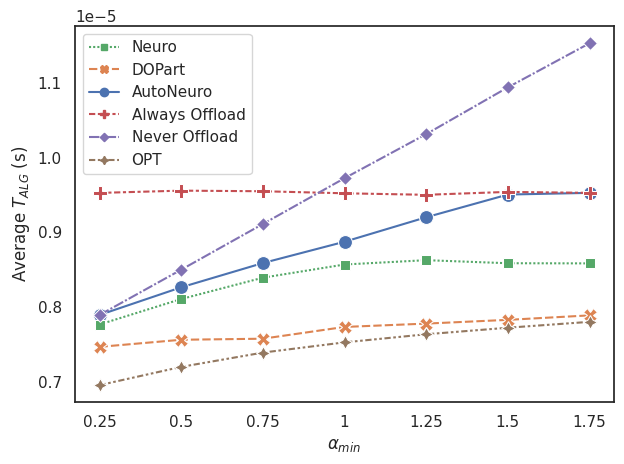

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

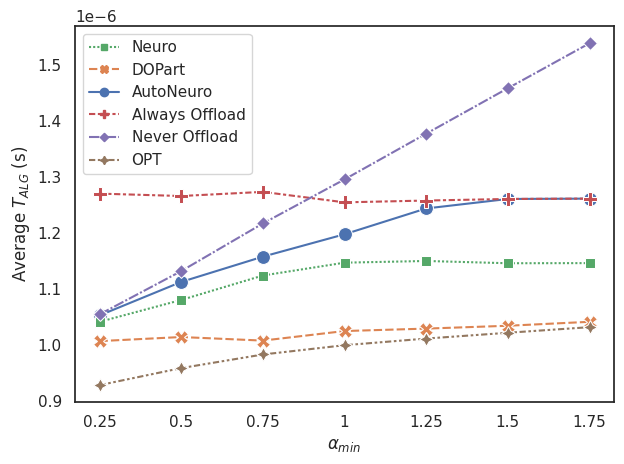

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

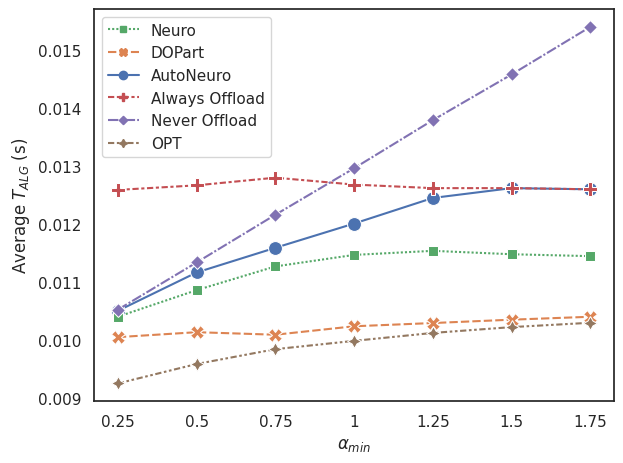

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

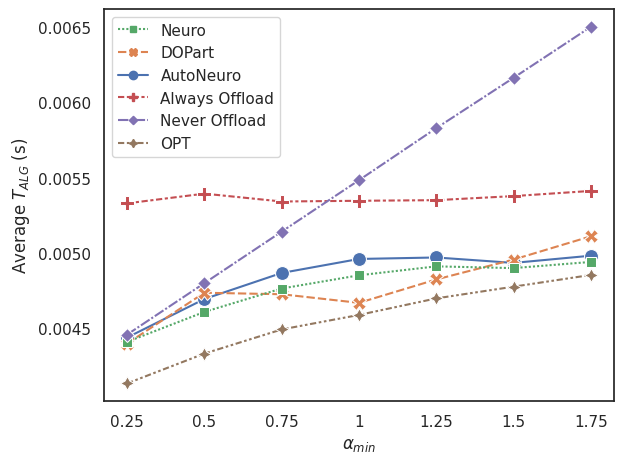

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

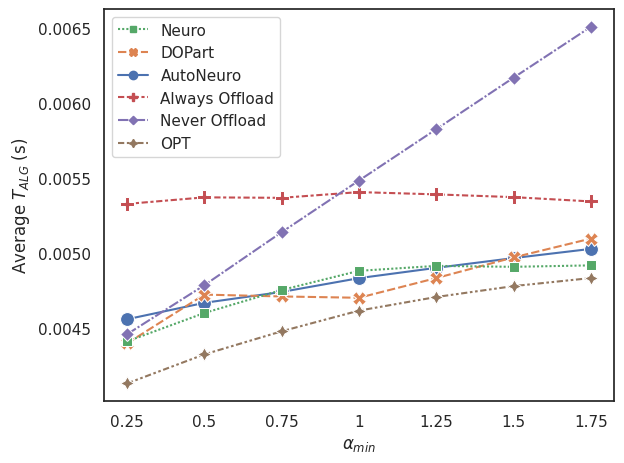

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

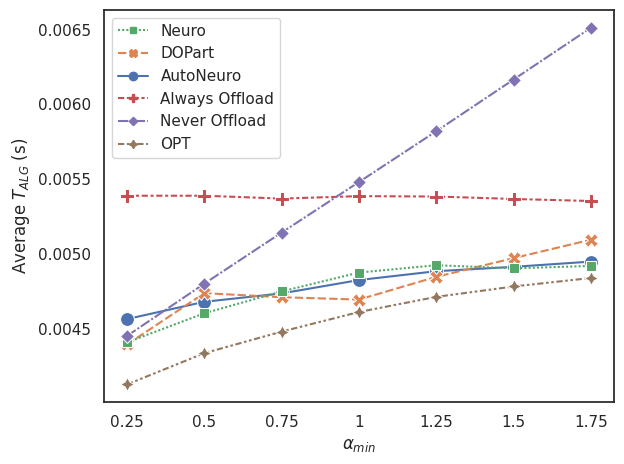

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

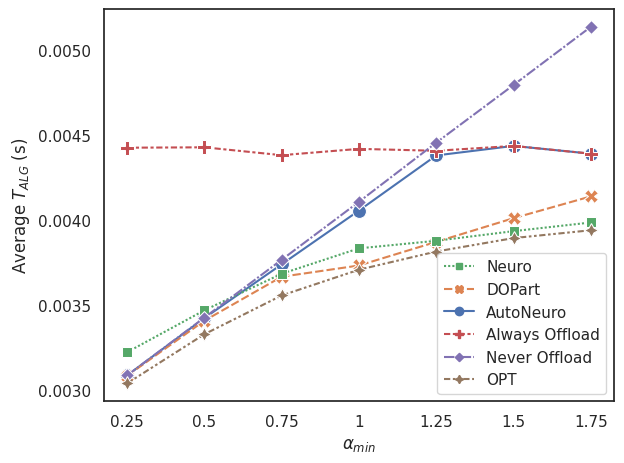

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

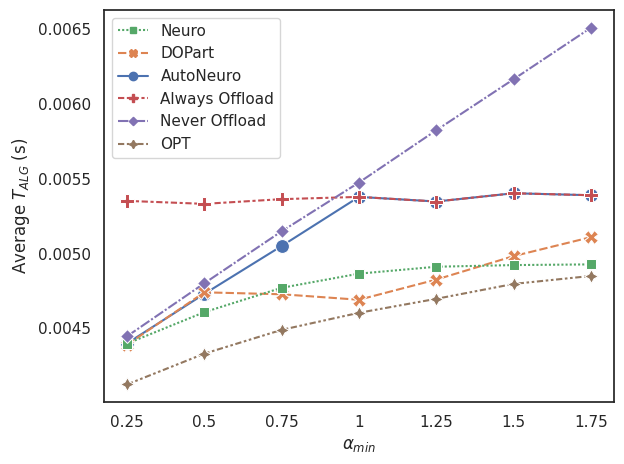

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

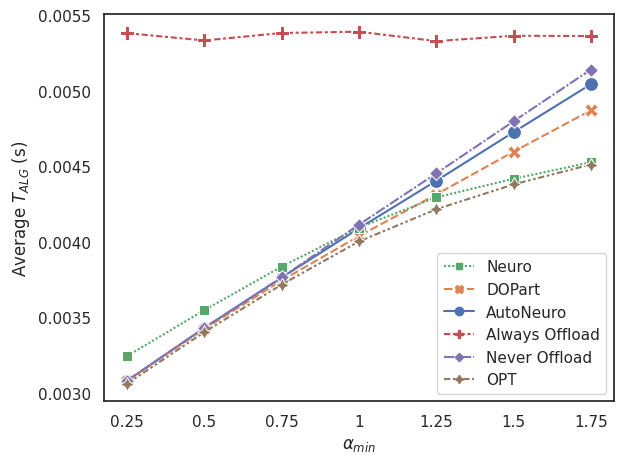

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

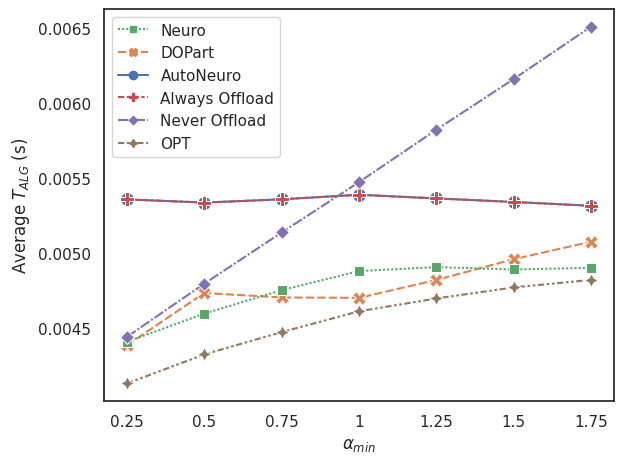

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

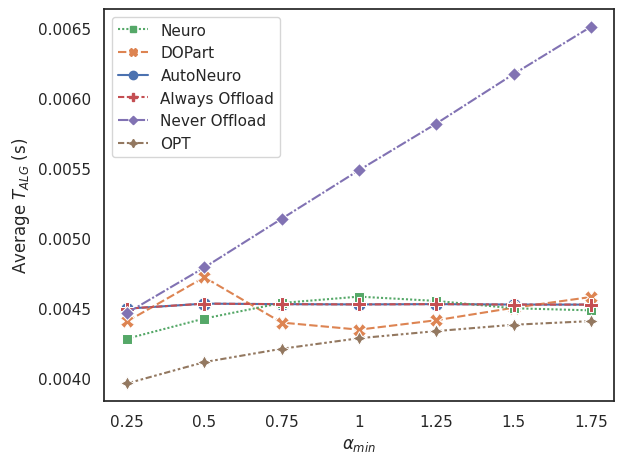

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

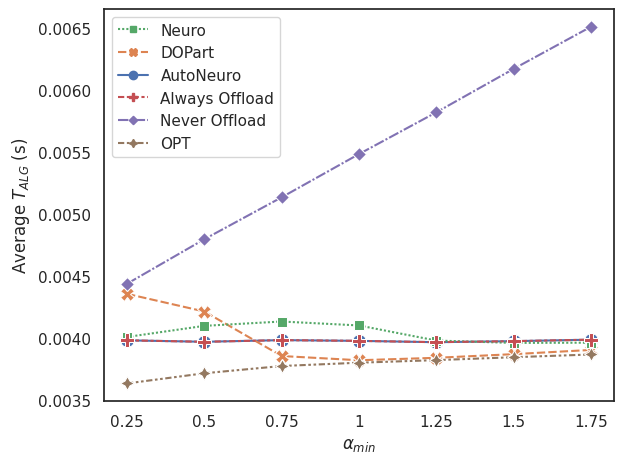

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

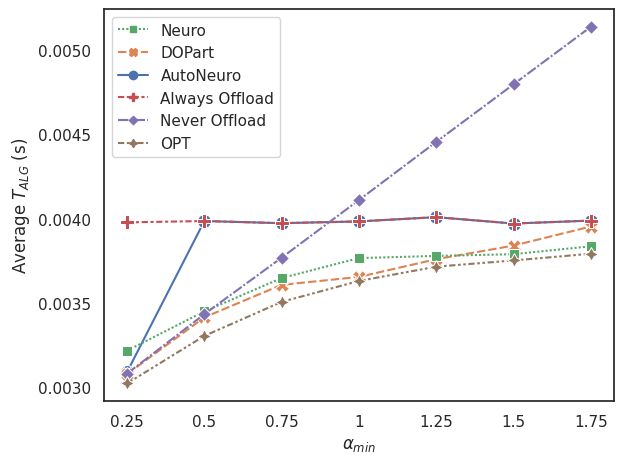

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

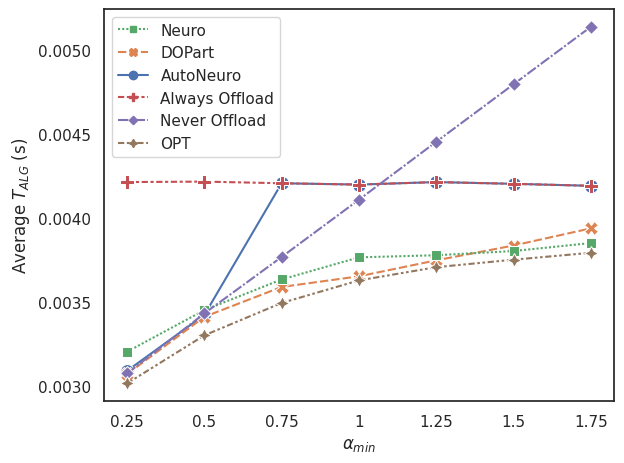

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

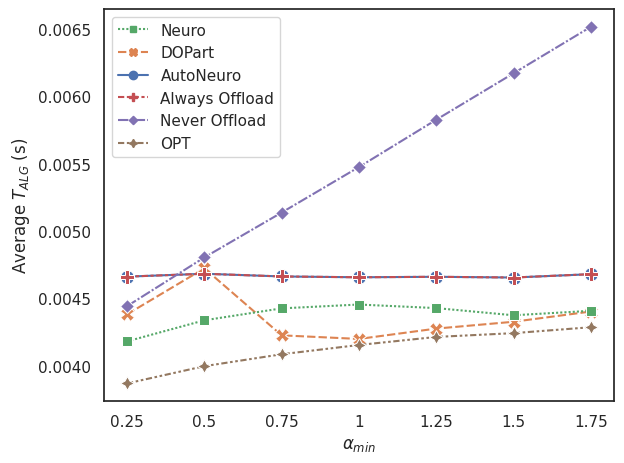

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

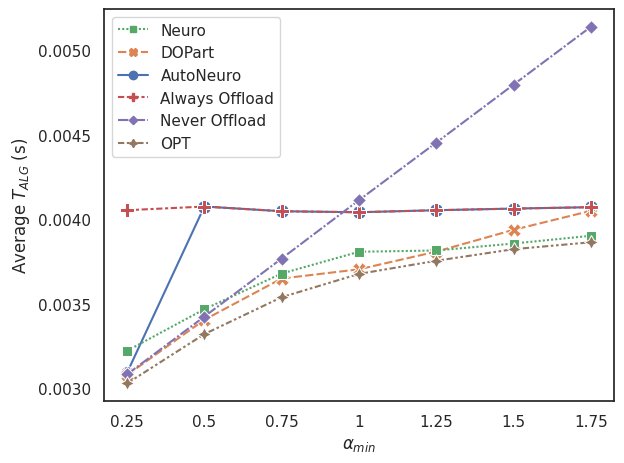

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

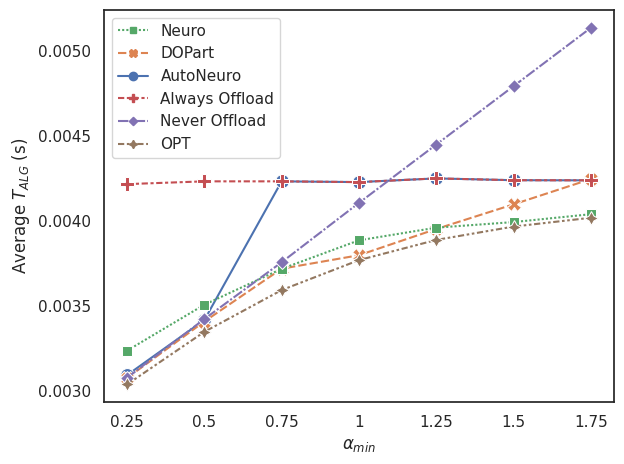

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

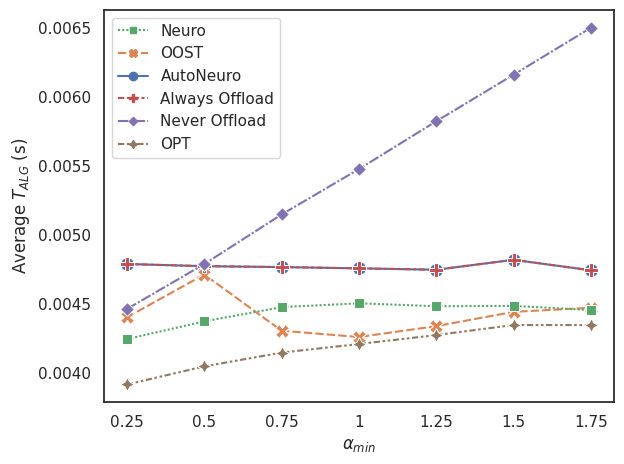

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

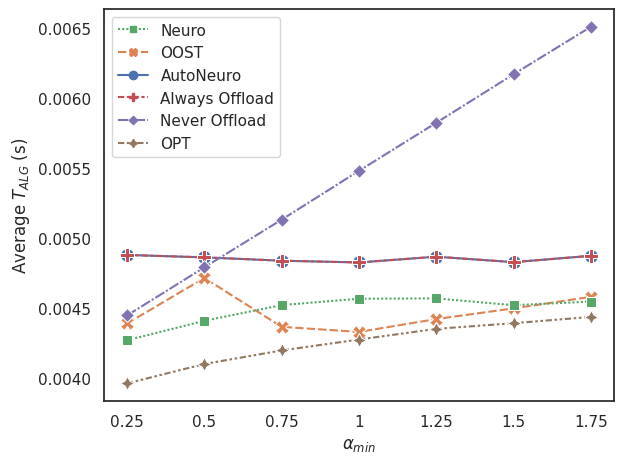

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic comms small
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

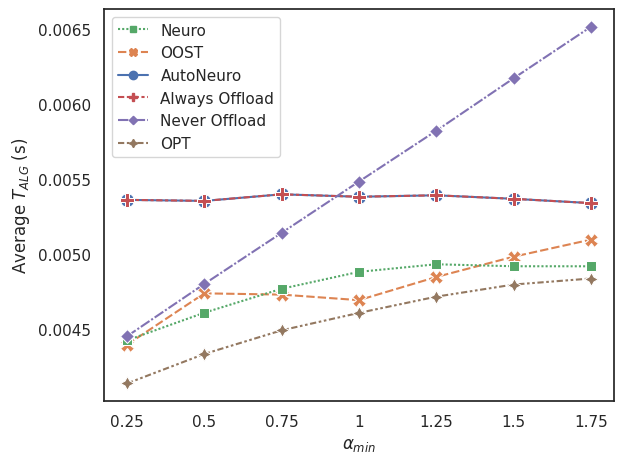

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 3
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

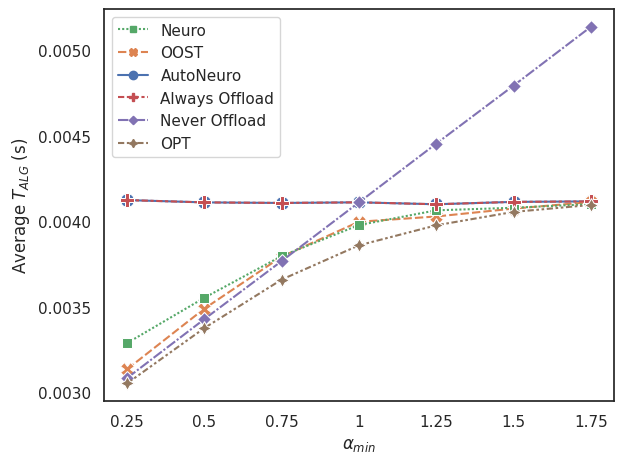

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 3
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

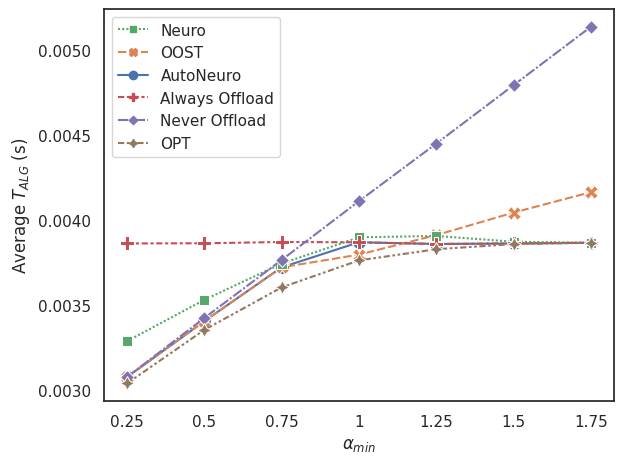

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 3
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(alphas) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','0.75','1','1.25','1.5','1.75'])
h.set_xlabel(r'$\alpha_{min}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

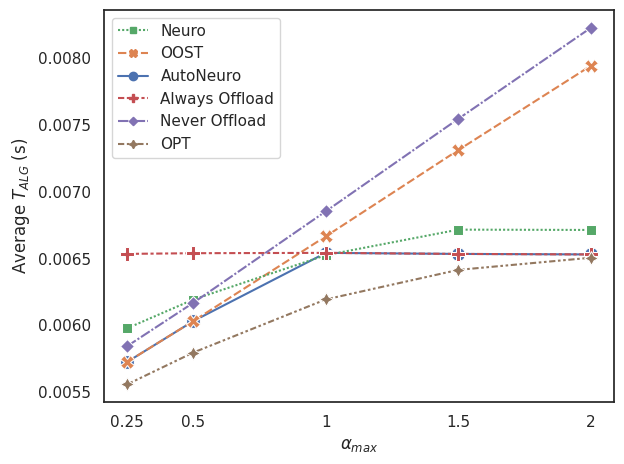

In [ ]:
#Lower Bandwidth range 3 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 3
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks([1/4,1/2,1,3/2,2]) # <--- set the ticks first
h.set_xticklabels(['0.25','0.5','1','1.5','2'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

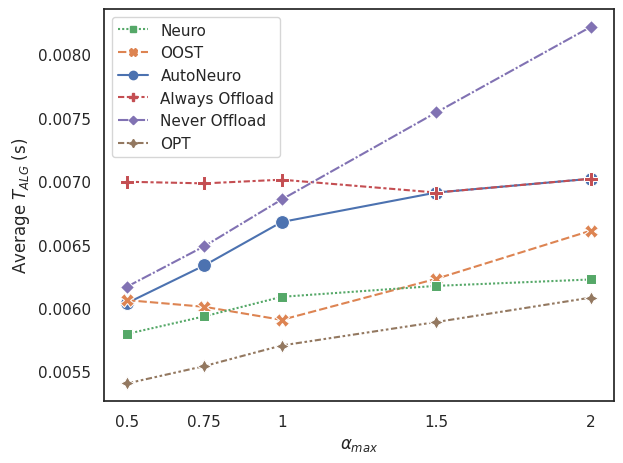

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 3
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks([1/2,3/4,1,3/2,2]) # <--- set the ticks first
h.set_xticklabels(['0.5','0.75','1','1.5','2'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

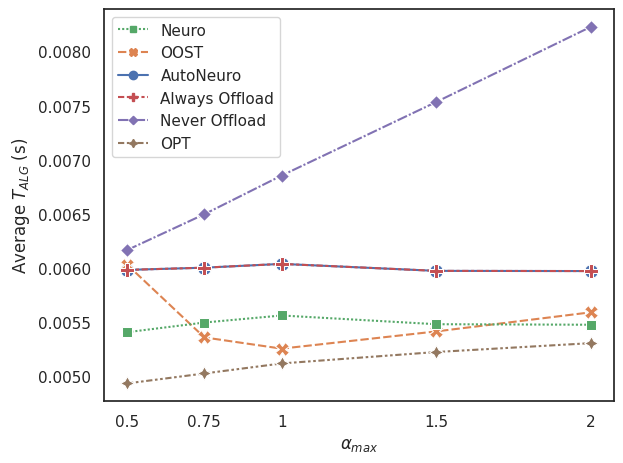

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 4.5
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks([1/2,3/4,1,3/2,2]) # <--- set the ticks first
h.set_xticklabels(['0.5','0.75','1','1.5','2'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

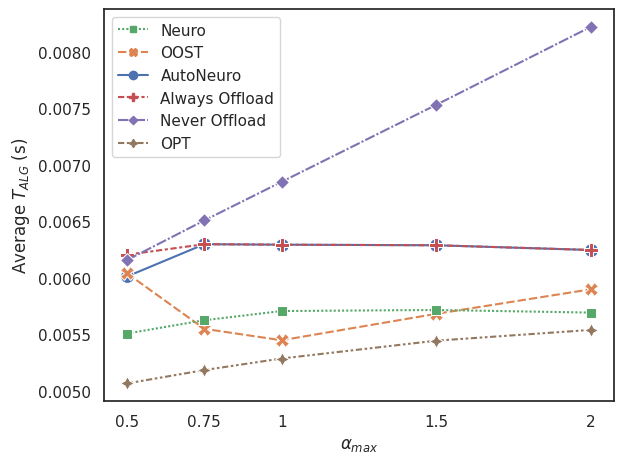

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (r+1/8)Tr/2 Fixed comms and comps for neuro Autodidactic 4
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks([1/2,3/4,1,3/2,2]) # <--- set the ticks first
h.set_xticklabels(['0.5','0.75','1','1.5','2'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)

plt.show()

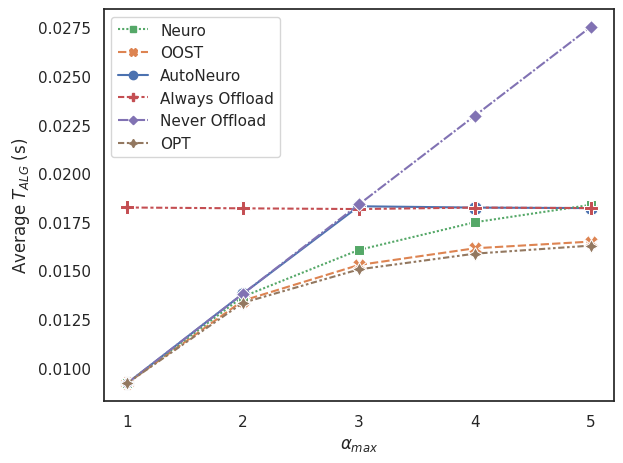

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro Autodidactic Neurosurgeon Implementation t4
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

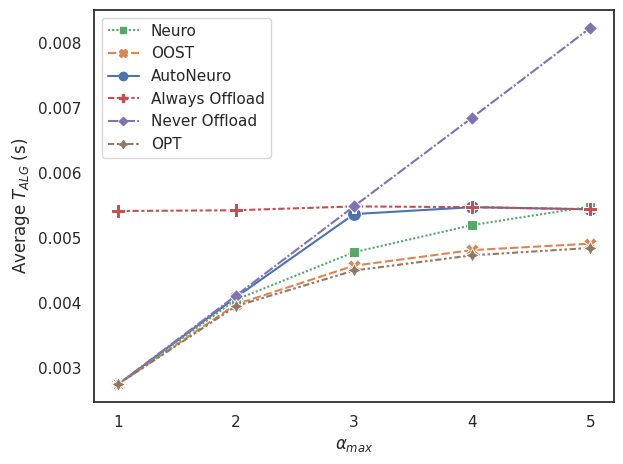

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro Autodidactic Neurosurgeon Implementation v100
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

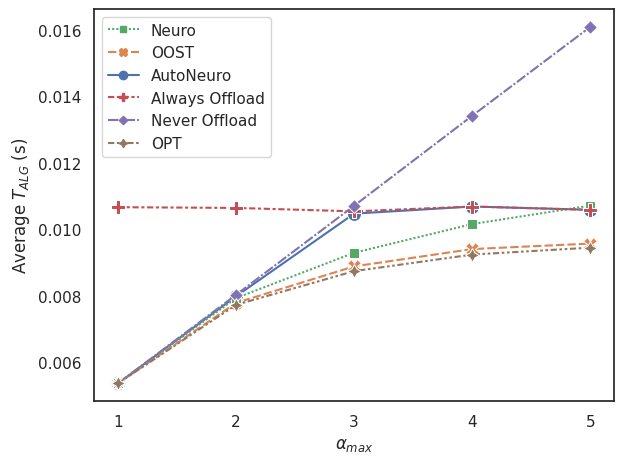

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro Autodidactic Neurosurgeon Implementation p100
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

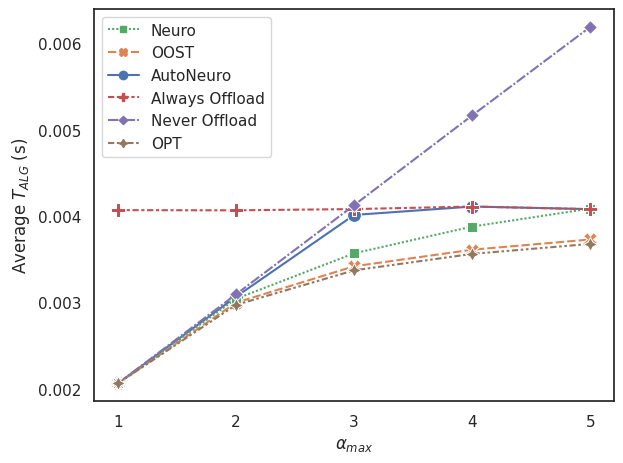

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro Autodidactic Neurosurgeon Implementation
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

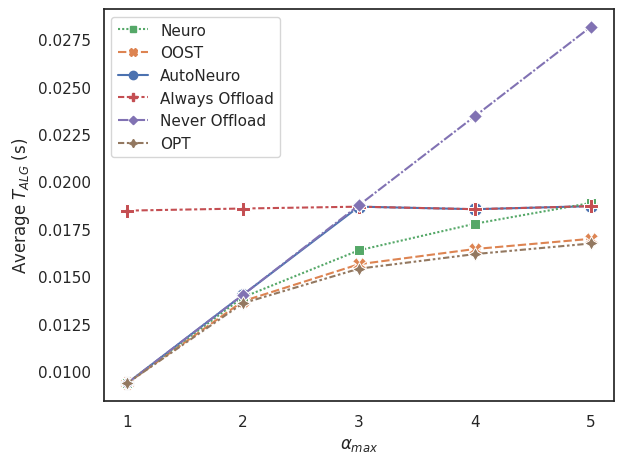

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro Autodidactic Neurosurgeon Implementation
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

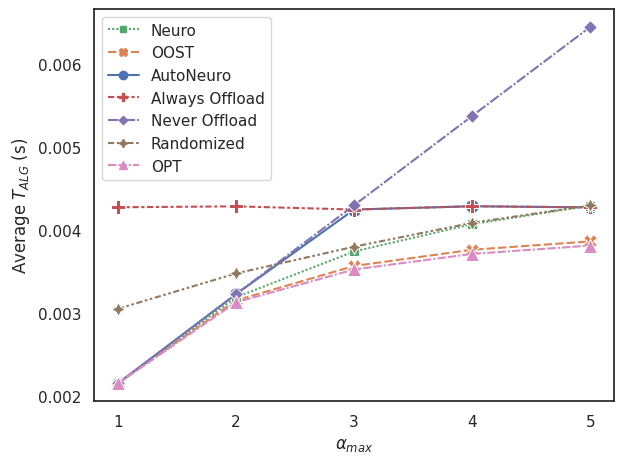

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro **
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()

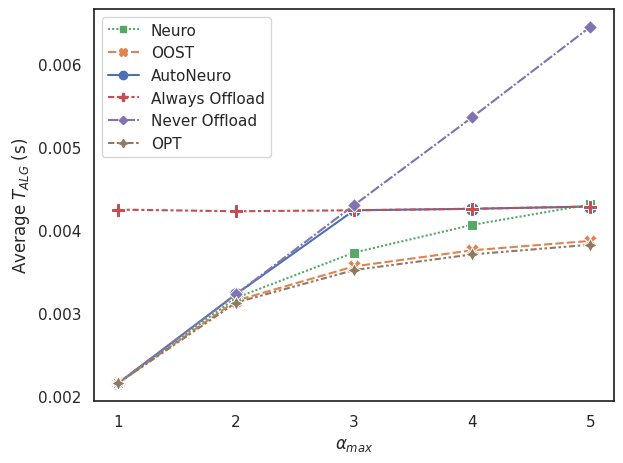

In [ ]:
#Lower Bandwidth range 1/3 - 6 Rl Rl = (3+1)Tr/2 Fixed comms and comps for neuro **
sns.set_style(style='white')
fig, ax = plt.subplots()
h = sns.lineplot(x="Alpha",y="Average Makespan", hue="Alg", data=df_main1, style="Alg",
    markers=True, dashes=True, markersize=10, errorbar=None) #NEWDOPartRAND
h.set_xticks(range(1,6)) # <--- set the ticks first
h.set_xticklabels(['1','2','3','4','5'])
h.set_xlabel(r'$\alpha_{max}$')
h.set_ylabel('Average '+r'$T_{ALG}$'+' (s)')

handles, labels = ax.get_legend_handles_labels()
handles[0], handles[2] = handles[2], handles[0]
labels[0], labels[2] = labels[2], labels[0]
ax.legend(handles=handles[0:], labels=labels[0:])
# ax.grid(False)
plt.show()